In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [85]:
file1 = '/home/sam/Documents/Projects/Mobile Tower/dumps/Sprint_Voltage_DashBoard_  Wed Oct 26 2022 17_07_16 GMT+0600 (Bangladesh Standard Time)_.csv'

file2 = '/home/sam/Documents/Projects/Mobile Tower/dumps/Search_Sprint_Current_ALV_Thu Oct 27 2022 09_29_34 GMT+0600 (Bangladesh Standard Time)_.csv'

df = pd.read_csv('../dumps/oct26.csv')
# df = pd.read_csv('../data/Land_Mobile_Broadcast_Towers.csv')
print(df.size)
df.head()

322660


,Subcenter,SiteName,BattVoltage,VoltageTime,PassThrough,SiteClass,Package,ExtAlarm,MainsFail,GeneratorRun,SiteDown,PGStart,PGEnd,BattType,BattApprox,MWHOP,UVendor
0,BARISAL,BSAGJ2,0,NaN,16.0,A,Package 2,GR|AVI,NaN,26/10/2022 16:34:04,NaN,NaN,NaN,VRLA,NaN,NaN,NaN
1,BARISAL,BSAM1M,0,NaN,0.0,B,Managed by Own,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,BARISAL,BSAM2M,0,NaN,0.0,B,Managed by Own,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,BARISAL,BSATK1,0,NaN,1.0,C,Package 1,BATT|MF,24/10/2022 04:09:58,NaN,24/10/2022,09:16:57,NaN,NaN,VRLA,NaN,NaN
4,BARISAL,BSBAR1,0,NaN,0.0,C,Package 1,BATT|MF,24/10/2022 03:55:54,NaN,24/10/2022,06:40:03,NaN,NaN,0,NaN,NaN


In [88]:
df.drop(columns=['MWHOP', 'UVendor'], inplace=True)

## External Alarms: 
- TEMP
- BATT: Battery at 45 volts
- MF: Main fail, power has gone out, running on battery power
- AVI
- GR
- DR

## Battery Types:
- VRLA
- 0
- nan
- Liion
- BSB
- NARADA
- YUASA

## Packages
- Package 2
- Managed by Own
- Package 1
- nan
- Package 3
- Package 5
- DC Sharing+DG Backup
- Package 6 (Small Cell)
- Package 4 (IBS_MC)
- Package - 1
- Hill Tracts (DC+DG)
- Hill Tracts (P2)
- Hill Tracts (P1)
- Hill Tracts (P5)
- Inside Another Site
- Dismantled/ Not Required
- AC Sharing+DG Backup
- Package - 2

In [ ]:
packs = list(df['GeneratorRun'].unique())
print(packs)
packs = [str(pack) for pack in packs]
packs = "\r\n".join(packs)

# import pyperclip
# pyperclip.copy(packs)



1
1879
525.3728011948224
531.0
35.046328270405844
1228.2451252370477


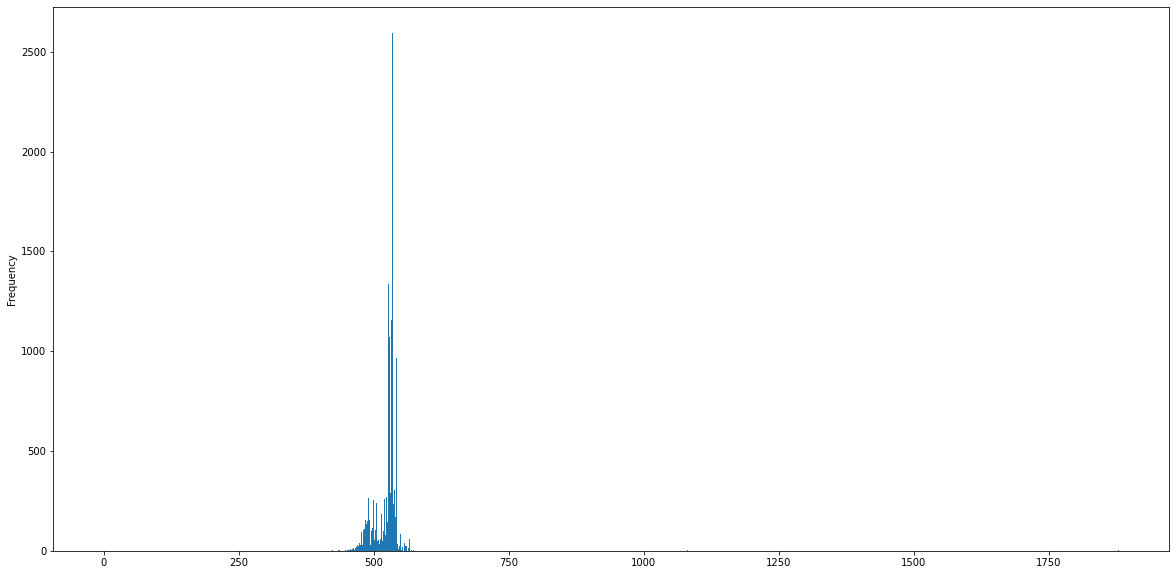

In [80]:
bat_df = df[df['BattVoltage'] != 0].copy()
print(bat_df['BattVoltage'].min())
print(bat_df['BattVoltage'].max())
print(bat_df['BattVoltage'].mean())
print(bat_df['BattVoltage'].median())
print(bat_df['BattVoltage'].std())
print(bat_df['BattVoltage'].var())


plt.figure(figsize=(20, 10))
bat_df['BattVoltage'].plot(kind='hist', bins=1000)
plt.show()

In [81]:
df[df['BattVoltage'] > 598]

,Subcenter,SiteName,BattVoltage,VoltageTime,PassThrough,SiteClass,Package,ExtAlarm,MainsFail,GeneratorRun,SiteDown,PGStart,PGEnd,BattType,BattApprox,MWHOP,UVendor
5587,DH_SOUTH,DHSTDI,1079,26/10/2022 16:37:02,1.0,B,Inside Another Site,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5588,DH_SOUTH,DHNSK3,1879,26/10/2022 16:37:02,1.0,B,Package 1,NaN,NaN,NaN,NaN,NaN,NaN,VRLA,NaN,NaN,NaN
7287,FARIDPUR,FPUZP1,1879,26/10/2022 16:35:03,2.0,C,Package 1,DR|DR,NaN,NaN,NaN,NaN,NaN,VRLA,NaN,NaN,NaN
7672,GAZIPUR_METRO,GPSKB1,1879,26/10/2022 16:37:02,25.0,A,Package 1,NaN,NaN,NaN,NaN,NaN,NaN,VRLA,NaN,NaN,NaN
9575,IBS_MICROCELL,DHFCLI,1064,26/10/2022 16:37:02,1.0,B,Managed by Own,NaN,NaN,NaN,NaN,NaN,NaN,BSB,NaN,NaN,NaN
10622,JATRABARI,NGSDG7,1079,26/10/2022 16:37:02,4.0,B,Package 1,AVI,NaN,NaN,NaN,NaN,NaN,Liion,NaN,NaN,NaN
12113,KHULNA_WEST,JSTRM1,1879,26/10/2022 16:35:03,16.0,A,Package 2,NaN,NaN,NaN,NaN,NaN,NaN,VRLA,NaN,NaN,NaN
12529,KUSHTIA,MHCDB1,1879,26/10/2022 16:35:03,1.0,C,Package 1,NaN,NaN,NaN,NaN,NaN,NaN,VRLA,NaN,NaN,NaN


In [52]:
ids = df['SiteName']
df[ids.isin(ids[ids.duplicated()])]

,Subcenter,SiteName,BattVoltage,VoltageTime,PassThrough,SiteClass,Package,ExtAlarm,MainsFail,GeneratorRun,SiteDown,PGStart,PGEnd,BattType,BattApprox,MWHOP,UVendor


In [14]:
alms = []


for alarms in df['ExtAlarm'].unique():
    if alarms is np.nan:
        continue
    splits = alarms.split('|')
    alms += splits
    

alms = list(set(alms))
alms

['TEMP', 'BATT', 'MF', 'AVI', 'GR', 'DR']

In [32]:
df_mf = df[df['MainsFail'].isnull() == False]
df_mf.size

45441

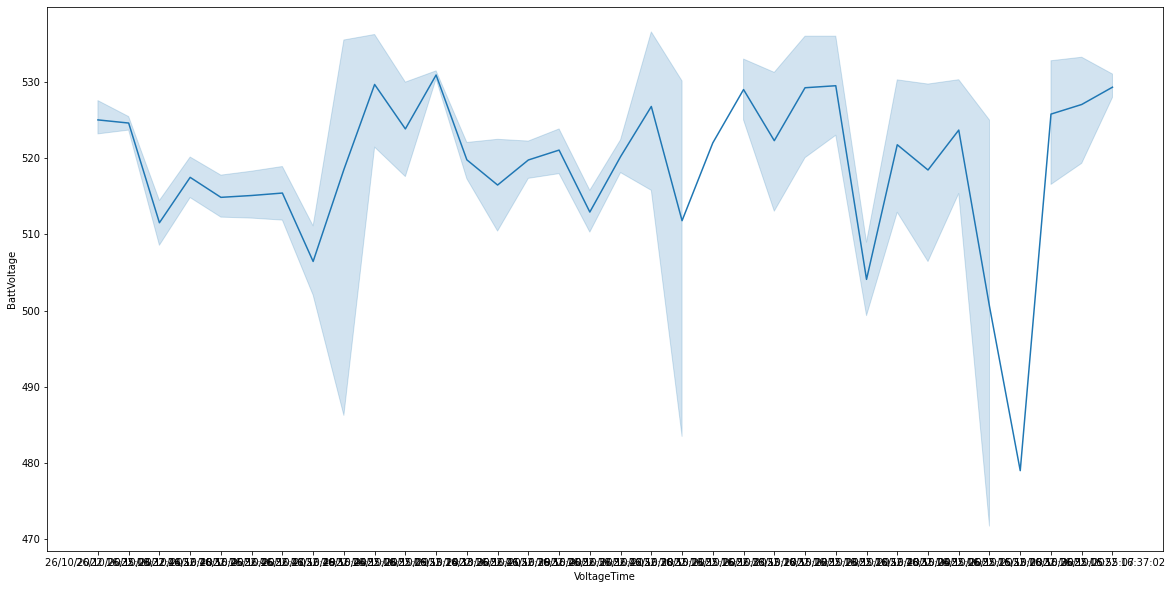

In [125]:
df_battv = df[df['VoltageTime'].isnull() == False]
df_battv.head()
# df_battv.plot(kind='line', x='VoltageTime', y='BattVoltage', figsize=(20, 10))
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_battv, x='VoltageTime', y='BattVoltage')
plt.show()

In [89]:
df

,Subcenter,SiteName,BattVoltage,VoltageTime,PassThrough,SiteClass,Package,ExtAlarm,MainsFail,GeneratorRun,SiteDown,PGStart,PGEnd,BattType,BattApprox
0,BARISAL,BSAGJ2,0,NaN,16.0,A,Package 2,GR|AVI,NaN,26/10/2022 16:34:04,NaN,NaN,NaN,VRLA,NaN
1,BARISAL,BSAM1M,0,NaN,0.0,B,Managed by Own,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BARISAL,BSAM2M,0,NaN,0.0,B,Managed by Own,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BARISAL,BSATK1,0,NaN,1.0,C,Package 1,BATT|MF,24/10/2022 04:09:58,NaN,24/10/2022,09:16:57,NaN,NaN,VRLA
4,BARISAL,BSBAR1,0,NaN,0.0,C,Package 1,BATT|MF,24/10/2022 03:55:54,NaN,24/10/2022,06:40:03,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18975,UNKNOWN,DHMRRC,538,26/10/2022 16:37:02,NaN,NaN,NaN,DR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18976,UNKNOWN,RSDRP2,539,26/10/2022 16:33:36,NaN,NaN,NaN,MF,26/10/2022 17:04:07,NaN,NaN,NaN,NaN,NaN,NaN
18977,UNKNOWN,RSNPR1,539,26/10/2022 16:33:36,NaN,NaN,NaN,MF,26/10/2022 17:03:47,NaN,NaN,NaN,NaN,NaN,NaN
18978,UNKNOWN,DHUAAO,539,26/10/2022 16:37:02,NaN,NaN,NaN,DR,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
sitedowns = df[df['SiteDown'].isnull() == False]
sitedowns

,Subcenter,SiteName,BattVoltage,VoltageTime,PassThrough,SiteClass,Package,ExtAlarm,MainsFail,GeneratorRun,SiteDown,PGStart,PGEnd,BattType,BattApprox
3,BARISAL,BSATK1,0,NaN,1.0,C,Package 1,BATT|MF,24/10/2022 04:09:58,NaN,24/10/2022,09:16:57,NaN,NaN,VRLA
4,BARISAL,BSBAR1,0,NaN,0.0,C,Package 1,BATT|MF,24/10/2022 03:55:54,NaN,24/10/2022,06:40:03,NaN,NaN,0
14,BARISAL,BSBMN1,0,NaN,NaN,C,NaN,MF|BATT,24/10/2022 14:40:48,NaN,24/10/2022,14:46:51,NaN,NaN,NaN
15,BARISAL,BSBNB1,0,NaN,1.0,C,Package 1,NaN,NaN,NaN,25/10/2022,21:51:14,NaN,NaN,VRLA
25,BARISAL,BSCNS1,0,NaN,0.0,C,Package 1,BATT|MF,24/10/2022 03:18:15,NaN,24/10/2022,08:34:19,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18477,TANGAIL,TNBL1M,0,NaN,0.0,C,Package 4 (IBS_MC),NaN,NaN,NaN,26/10/2022,16:40:37,NaN,NaN,0
18504,TANGAIL,TNMPB1,0,NaN,1.0,C,Package 2,AVI,NaN,NaN,26/10/2022,16:43:13,NaN,NaN,VRLA
18651,TANGAIL,TNBBT1,0,NaN,NaN,NaN,NaN,MF,24/10/2022 20:41:54,NaN,25/10/2022,00:26:02,NaN,NaN,NaN
18653,TANGAIL,TNBLP1,474,26/10/2022 16:32:44,NaN,C,NaN,BATT|MF,26/10/2022 08:08:52,NaN,26/10/2022,16:54:33,NaN,NaN,NaN


In [101]:
sitedowns['ExtAlarm'].value_counts()

BATT|MF            460
MF                  90
BATT                61
MF|BATT             39
BATT|MF|DR          25
DR                  17
BATT|DR             11
BATT|MF|MF           9
BATT|MF|AVI          8
MF|BATT|DR           7
AVI                  4
MF|BATT|MF           4
AVI|MF               3
GR                   3
BATT|AVI|MF          3
BATT|DR|MF           3
MF|AVI               3
MF|MF                3
MF|DR|BATT           2
DR|MF                2
BATT|MF|MF|DR        2
MF|DR                2
AVI|BATT|MF          2
BATT|MF|BATT|DR      1
DR|BATT|MF           1
DR|TEMP              1
BATT|BATT            1
BATT|TEMP            1
DR|BATT              1
BATT|MF|TEMP         1
MF|TEMP              1
AVI|MF|BATT          1
BATT|BATT|BATT       1
BATT|MF|DR|AVI       1
Name: ExtAlarm, dtype: int64

In [102]:
sitedowns[sitedowns['ExtAlarm'].isnull() == False]

,Subcenter,SiteName,BattVoltage,VoltageTime,PassThrough,SiteClass,Package,ExtAlarm,MainsFail,GeneratorRun,SiteDown,PGStart,PGEnd,BattType,BattApprox
3,BARISAL,BSATK1,0,NaN,1.0,C,Package 1,BATT|MF,24/10/2022 04:09:58,NaN,24/10/2022,09:16:57,NaN,NaN,VRLA
4,BARISAL,BSBAR1,0,NaN,0.0,C,Package 1,BATT|MF,24/10/2022 03:55:54,NaN,24/10/2022,06:40:03,NaN,NaN,0
14,BARISAL,BSBMN1,0,NaN,NaN,C,NaN,MF|BATT,24/10/2022 14:40:48,NaN,24/10/2022,14:46:51,NaN,NaN,NaN
25,BARISAL,BSCNS1,0,NaN,0.0,C,Package 1,BATT|MF,24/10/2022 03:18:15,NaN,24/10/2022,08:34:19,NaN,NaN,0
27,BARISAL,BSDSP1,0,NaN,1.0,C,Package 1,BATT|MF,25/10/2022 02:10:11,NaN,25/10/2022,09:01:27,NaN,NaN,Liion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18041,SYLHET_EAST,SYFTG1,0,NaN,NaN,NaN,NaN,MF,26/10/2022 14:38:08,NaN,26/10/2022,14:50:02,NaN,NaN,NaN
18504,TANGAIL,TNMPB1,0,NaN,1.0,C,Package 2,AVI,NaN,NaN,26/10/2022,16:43:13,NaN,NaN,VRLA
18651,TANGAIL,TNBBT1,0,NaN,NaN,NaN,NaN,MF,24/10/2022 20:41:54,NaN,25/10/2022,00:26:02,NaN,NaN,NaN
18653,TANGAIL,TNBLP1,474,26/10/2022 16:32:44,NaN,C,NaN,BATT|MF,26/10/2022 08:08:52,NaN,26/10/2022,16:54:33,NaN,NaN,NaN


In [123]:
sitedowns[(sitedowns['BattVoltage'] > 0) & (sitedowns['SiteDown'] > '25/10/2022')]

,Subcenter,SiteName,BattVoltage,VoltageTime,PassThrough,SiteClass,Package,ExtAlarm,MainsFail,GeneratorRun,SiteDown,PGStart,PGEnd,BattType,BattApprox
346,BARISAL,BSDDR1,509,26/10/2022 16:35:03,1.0,C,Package 1,DR,NaN,NaN,26/10/2022,17:00:53,NaN,NaN,VRLA
383,BARISAL,JKLBN1,528,26/10/2022 16:35:03,2.0,C,Package 1,NaN,NaN,NaN,26/10/2022,16:45:04,NaN,NaN,VRLA
403,BARISAL,BSBAG1,536,26/10/2022 16:35:03,1.0,C,Package 1,BATT|MF,26/10/2022 13:51:10,NaN,26/10/2022,13:59:45,NaN,NaN,VRLA
417,BARISAL,JKKTP1,536,26/10/2022 16:35:03,1.0,C,Package 5,BATT|MF,26/10/2022 03:38:53,NaN,26/10/2022,16:44:57,NaN,NaN,NaN
437,BARISAL,BSBSR1,543,26/10/2022 16:35:03,6.0,C,Package 2,DR,NaN,NaN,26/10/2022,17:00:49,NaN,NaN,VRLA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15886,PATUAKHALI,BRKKA1,537,26/10/2022 16:35:03,NaN,NaN,NaN,NaN,NaN,NaN,26/10/2022,09:13:32,NaN,NaN,NaN
15894,PATUAKHALI,BRGTK1,541,26/10/2022 16:35:03,1.0,C,Package 1,MF,26/10/2022 08:08:34,NaN,26/10/2022,12:14:19,NaN,NaN,Liion
17358,SAVAR,DHDRI8,468,26/10/2022 16:37:02,1.0,B,Package 1,BATT|MF|DR,26/10/2022 11:54:55,NaN,26/10/2022,16:49:59,NaN,NaN,VRLA
18348,SYLHET_WEST,SNKRM1,506,26/10/2022 16:32:44,2.0,C,Package 5,NaN,NaN,NaN,26/10/2022,14:16:14,NaN,NaN,NaN
